In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
df = pd.read_csv(r'1954319_114104.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-07-04,1954319,114104,871
2015-07-11,1954319,114104,1003
2015-07-18,1954319,114104,59
2015-07-25,1954319,114104,1532
2015-08-01,1954319,114104,2049


In [23]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

,historyamount
historybegdate,
2015-07-04,871
2015-07-11,1003
2015-07-18,59
2015-07-25,1532
2015-08-01,2049
2015-08-08,2323
2015-08-15,2484
2015-08-22,2521
2015-08-29,2850


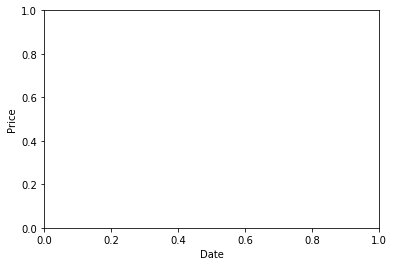

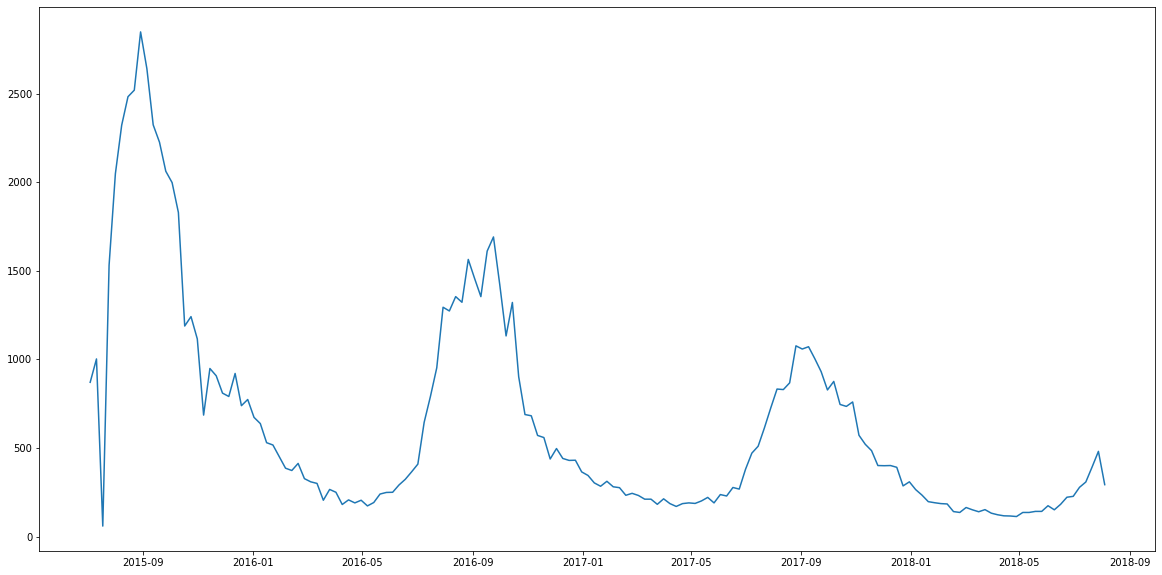

In [24]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

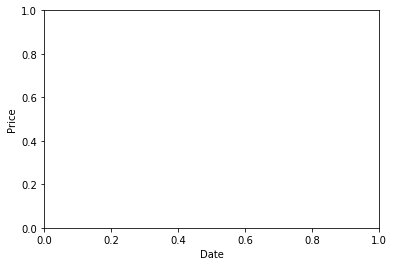

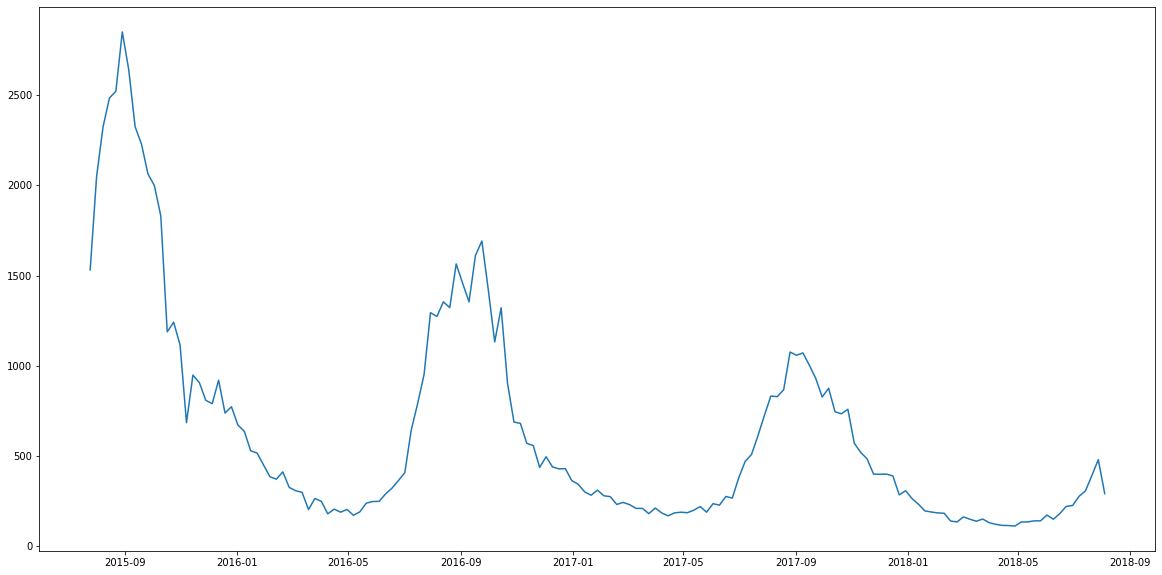

In [25]:
df = df.iloc[3:]
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [26]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-07-25                NaN
2015-08-01                NaN
2015-08-08                NaN
2015-08-15            2097.00
2015-08-22            2344.25
2015-08-29            2544.50
2015-09-05            2624.25
2015-09-12            2584.50
2015-09-19            2511.00
2015-09-26            2314.25
2015-10-03            2153.50
2015-10-10            2029.75
2015-10-17            1770.25
2015-10-24            1565.00
2015-10-31            1344.25
2015-11-07            1058.25
2015-11-14             998.25
2015-11-21             914.75
2015-11-28             838.25
2015-12-05             864.50
159


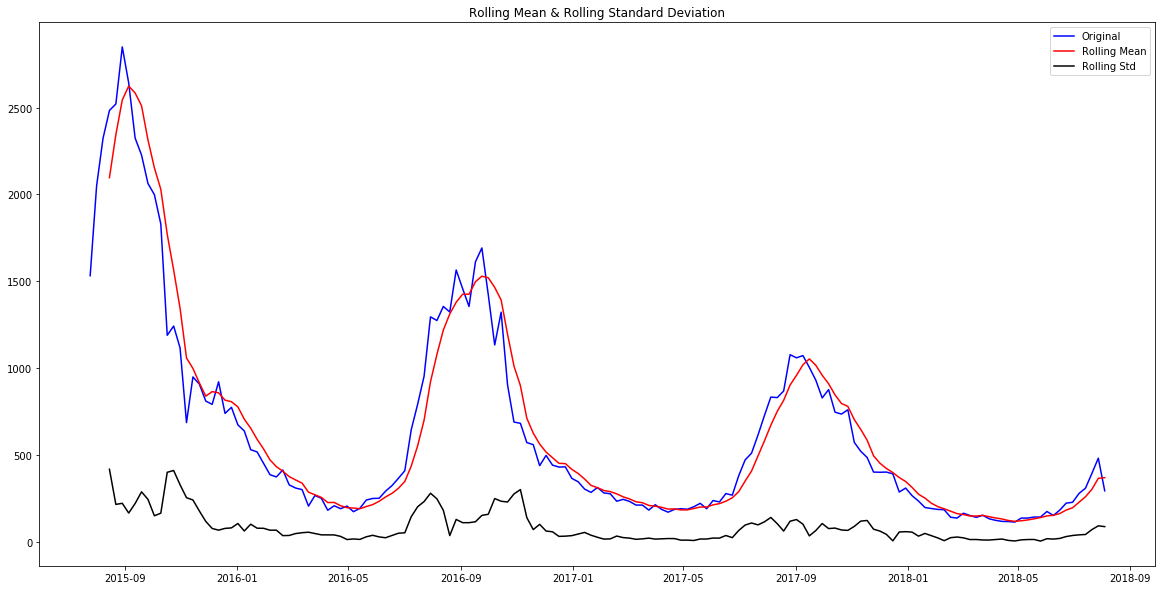

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [28]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.142404584253019
p-value: 0.023570102956636464
No. OF Lags USed: 10
No. OF Observations USed: 148
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873


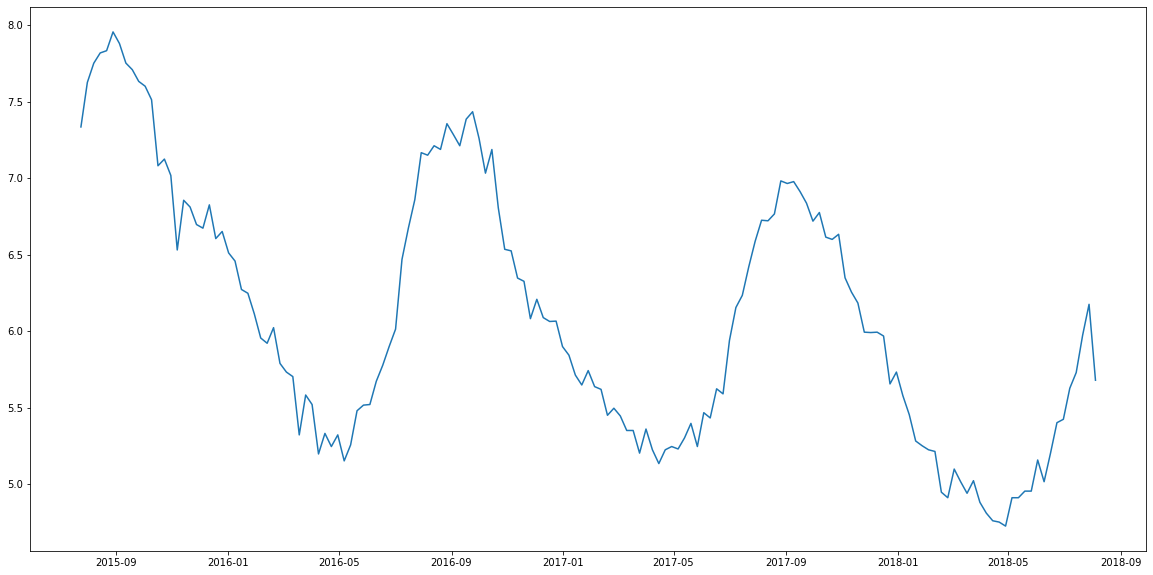

In [29]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [37]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

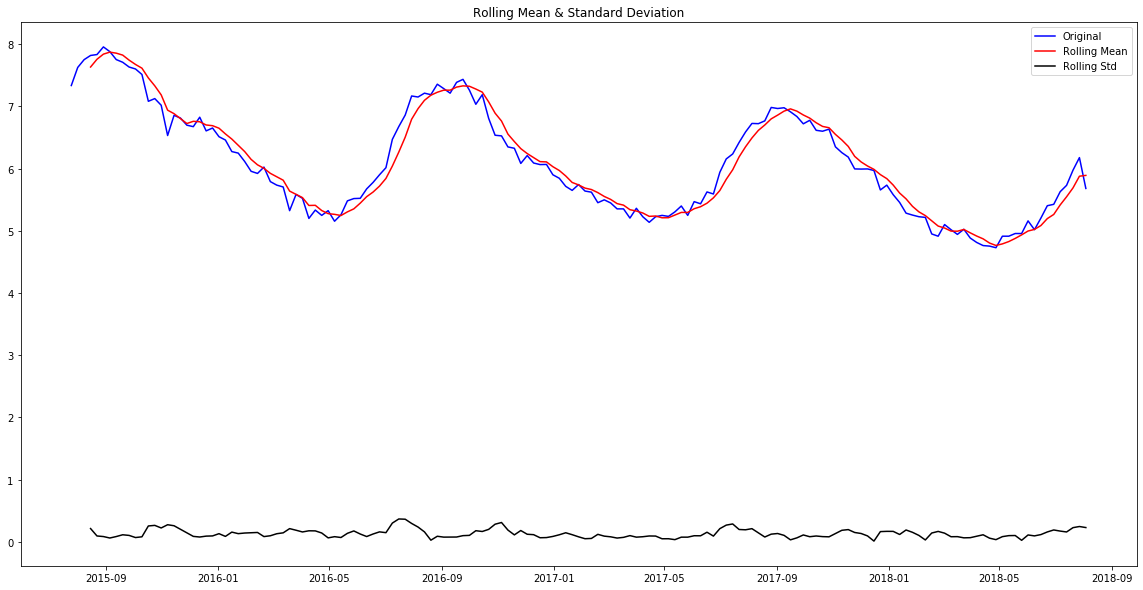

ADF Statistic: -3.9348061103635166
p-value: 0.0017931132678529803
No. OF Lags USed: 4
No. OF Observations USed: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


In [38]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

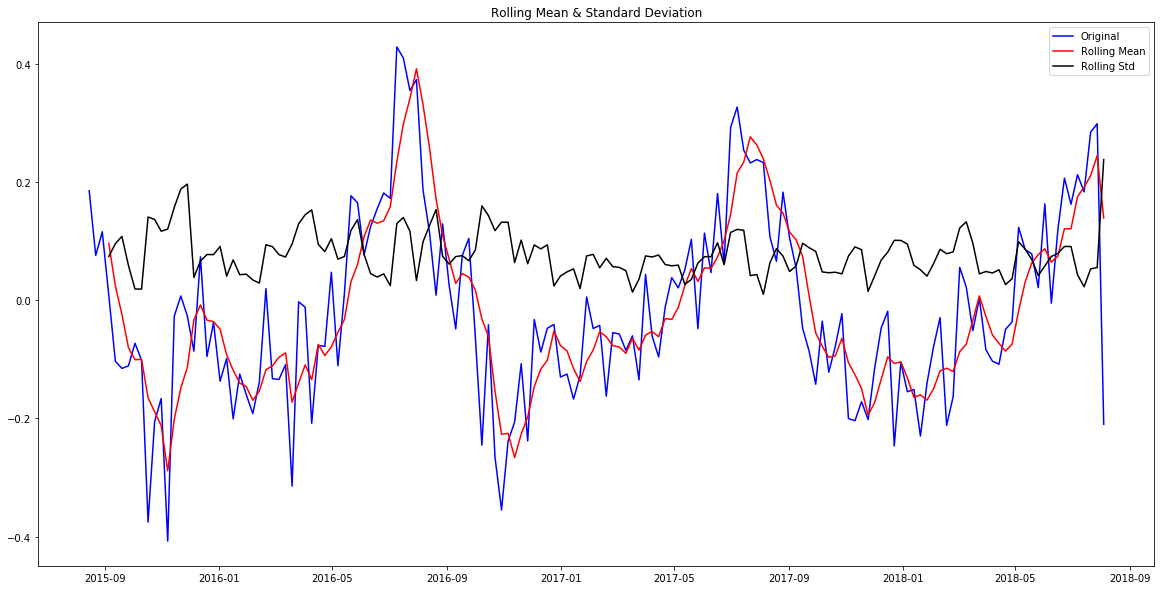

ADF Statistic: -3.6963099936739554
p-value: 0.0041653577771260065
No. OF Lags USed: 10
No. OF Observations USed: 145
Critical Values:
	1%: -3.476273058920005
	5%: -2.881687616548444
	10%: -2.5775132580261593


In [39]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

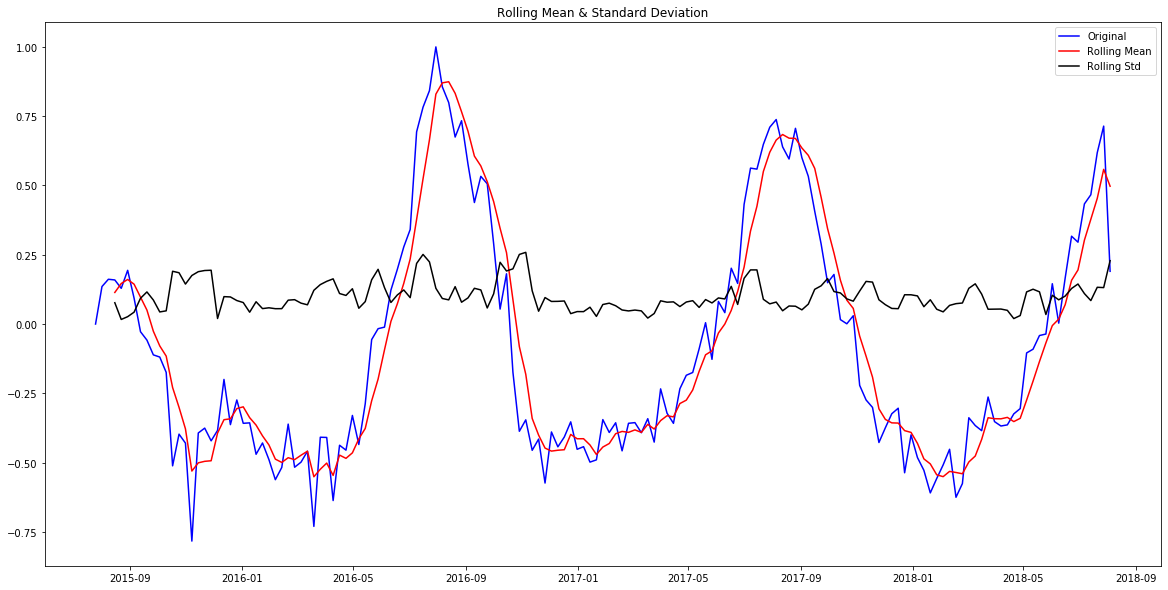

ADF Statistic: -4.246905617582862
p-value: 0.0005482626233964285
No. OF Lags USed: 9
No. OF Observations USed: 149
Critical Values:
	1%: -3.4750180242954167
	5%: -2.8811408028842043
	10%: -2.577221358046935


In [40]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

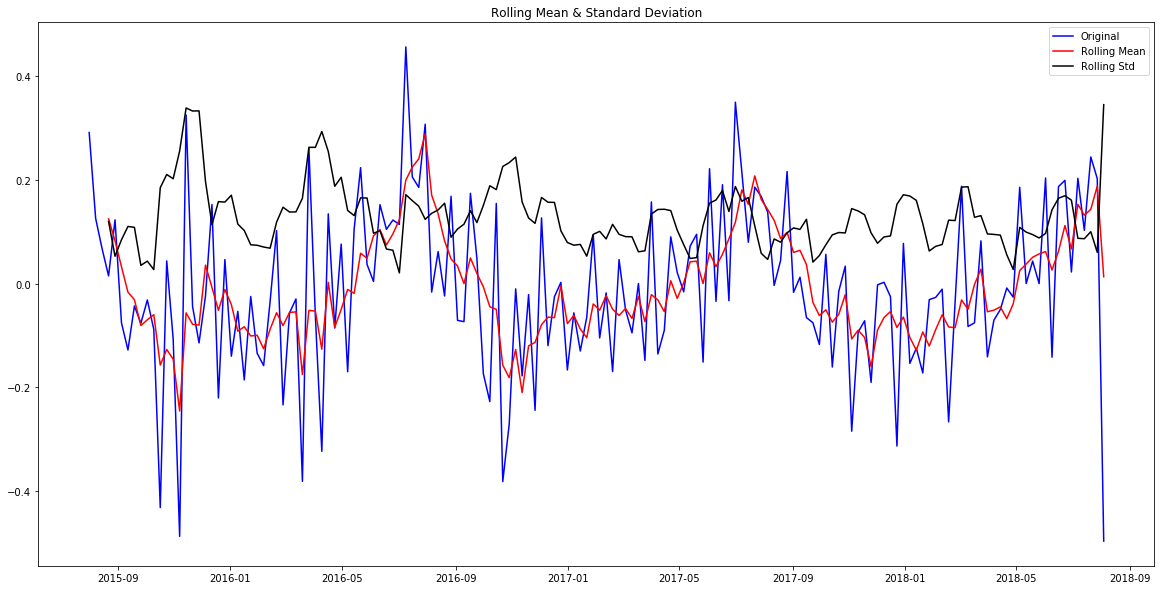

ADF Statistic: -3.0119525505442195
p-value: 0.0337931591235322
No. OF Lags USed: 3
No. OF Observations USed: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


In [42]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [51]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


Text(0.5, 1.0, 'Autocorrelation Function')

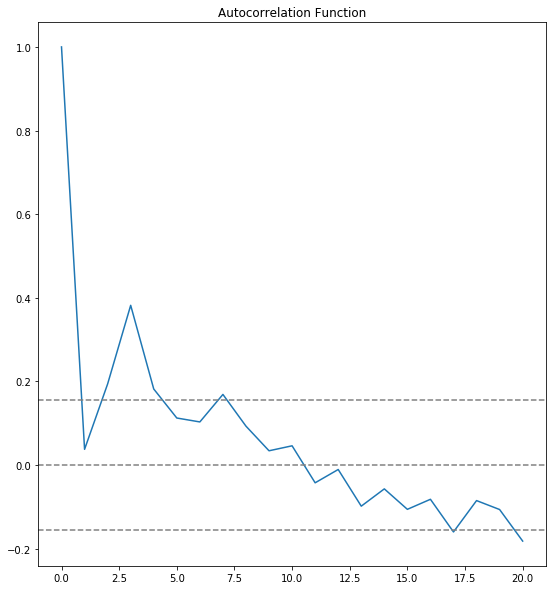

In [52]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

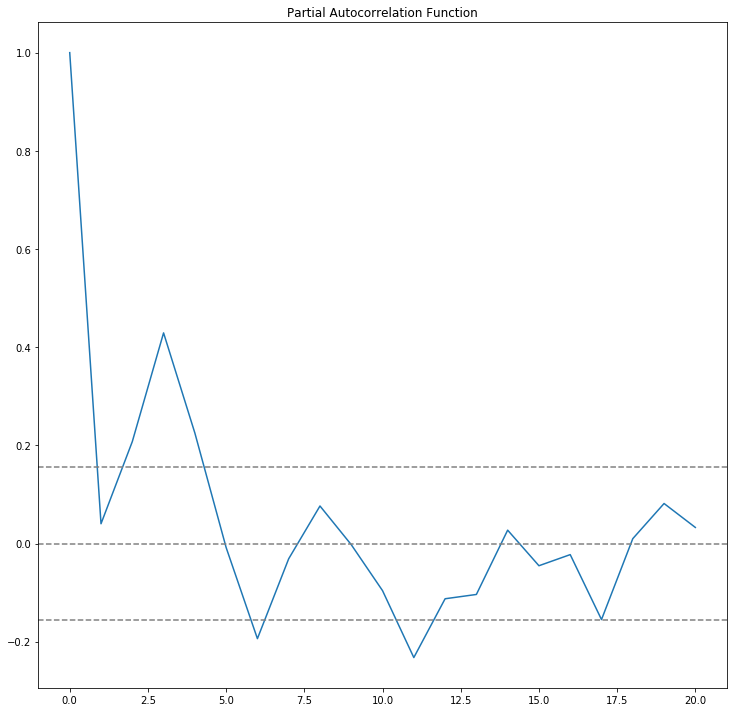

In [55]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  -166.96573421355066
Plotting AR Model


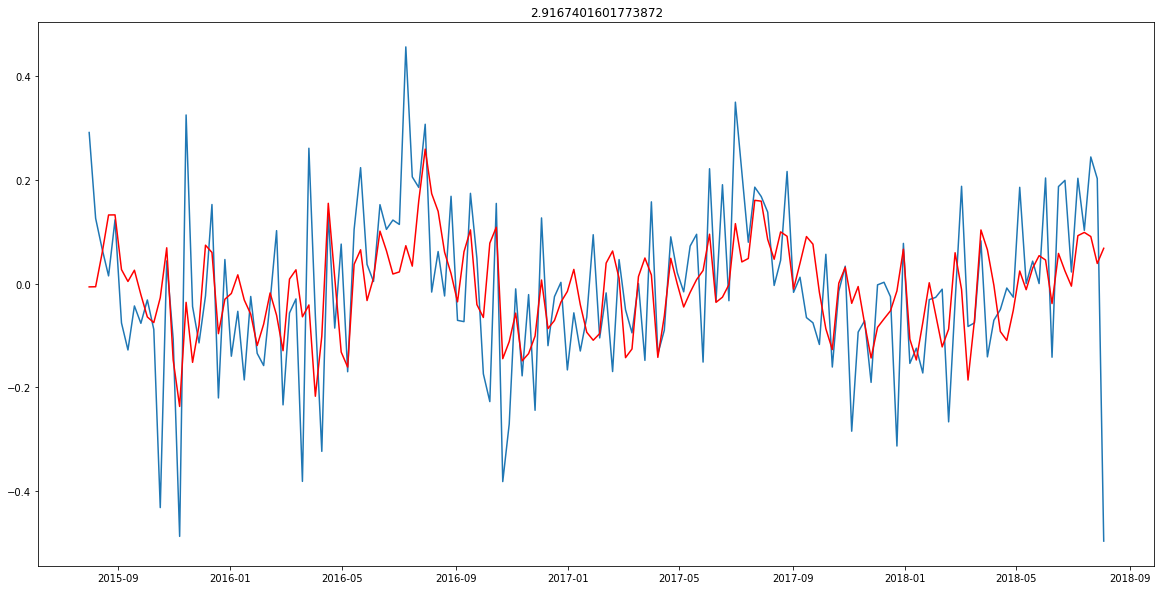

In [63]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(3,1,3))# (p,d,q)
results = model.fit()
print('aic value for this model is ',results.aic)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
plt.title(sum((results.fittedvalues-df_log_shift['historyamount'])**2))
#plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_exp_decay['historyamount'])**2))
print('Plotting AR Model')

In [64]:
df_log_forecast = results.forecast(steps=52)[0]
print(df_log_forecast)

[5.96777634 5.93493164 5.73308484 5.68522924 5.75126488 5.75399796
 5.69157584 5.65728775 5.66355652 5.66209612 5.63986441 5.62056388
 5.61390835 5.60836727 5.59715921 5.58540429 5.57723692 5.57036801
 5.56222922 5.55363786 5.54600076 5.5390122  5.53184347 5.52451463
 5.51743677 5.51062504 5.5038407  5.49702625 5.49028481 5.48364625
 5.47704793 5.47045609 5.46389125 5.45736675 5.45086733 5.44437878
 5.43790303 5.43144411 5.42499837 5.4185605  5.41212949 5.40570609
 5.39928927 5.39287713 5.38646877 5.38006408 5.37366268 5.36726383
 5.36086704 5.35447211 5.34807882 5.34168689]


In [69]:
final_prediction = np.exp(df_log_forecast)
print(final_prediction)
print(type(final_prediction))
rng = pd.date_range(start = "9/22/2018",end = "9/20/2019",freq='W')
csv_data = pd.Series(final_prediction,index=rng)
print(type(csv_data))
print(csv_data)

[390.63606072 378.01415401 308.92076993 294.48534533 314.58832633
 315.44929476 296.36027054 286.37087896 288.17171092 287.75117102
 281.42455659 276.04499497 274.21387133 272.69863192 269.65927344
 266.50800793 264.34020369 262.53069575 260.40268374 258.17505401
 256.21085621 254.42655249 252.60915827 250.76459385 248.99598462
 247.30565408 245.63352804 243.96536042 242.32621498 240.72284498
 239.13970623 237.56852091 236.01402925 234.47916861 232.96013101
 231.45345262 229.95945955 228.47895671 227.01097621 225.5542033
 224.10831614 222.67339135 221.24911284 219.83497121 218.43069327
 217.03618348 215.65128419 214.27577008 212.90946786 211.55227007
 210.20407039 208.86474527]
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
2018-09-23    390.636061
2018-09-30    378.014154
2018-10-07    308.920770
2018-10-14    294.485345
2018-10-21    314.588326
2018-10-28    315.449295
2018-11-04    296.360271
2018-11-11    286.370879
2018-11-18    288.171711
2018-11-25    287.751171
201

In [70]:
import os
path=r'C:\Users\80071\Desktop\PTC_Forecast'
csv_data.to_csv(os.path.join(path,r'1954319_114104_forecast.csv'))

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


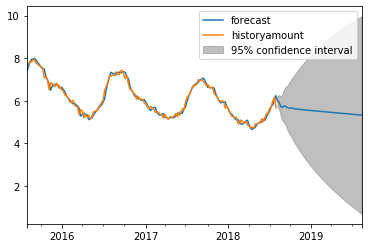

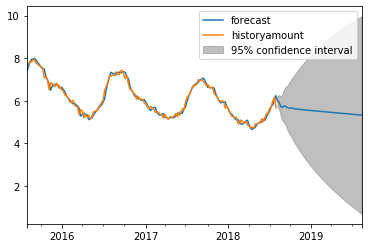

In [67]:
results.plot_predict(1,212)